Data Preparation for Modelling

Using an open dataset with data on various types of cereal and the corresponding customer ratings.

Create a dataframe by importing the file into Jupyter

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("cereal.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [6]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [7]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [8]:
df.head

<bound method NDFrame.head of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0  

 Data Cleaning

1.Renaming the  columns.
2.Carbohydrates,sugar and potassium have negative value that will be replaced with mean value.
3.Checked for the 0's, for this particular dataset, it makes sense to have the 0's.
4.Making the cupssizes uniform to one cup per serving, in order to compare the cereals for uniform serving size.
4.Making groups of ratings to gage the 

In [9]:
df=df.rename(columns={'name':'Name','mfr':'Manufacturer','type':'Type','calories':'Calories','protein':'Protein','fat':'Fat','sodium':'Sodium','fiber':'Fiber','carbo':'Carbohydrates','sugars':'Sugars','potass':'Potassium','vitamins':'Vitamins','shelf':'Shelf','weight':'Weight','cups':'Cup','rating':'Rating'})

In [10]:
df.columns

Index(['Name', 'Manufacturer', 'Type', 'Calories', 'Protein', 'Fat', 'Sodium',
       'Fiber', 'Carbohydrates', 'Sugars', 'Potassium', 'Vitamins', 'Shelf',
       'Weight', 'Cup', 'Rating'],
      dtype='object')

In [11]:
df.describe()

,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [12]:
df.Potassium = df.Potassium.replace(-1,90)

In [13]:
df.head(7)

,Name,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,90,25,3,1.0,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094


In [14]:
df.Sugars = df.Sugars.replace(-1,6.9)

In [15]:
df.Carbohydrates = df.Carbohydrates.replace(-1,14)

In [16]:
df.describe()

,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.792208,7.024675,98.441558,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.882612,4.349778,69.491857,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,45.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [17]:
df.dtypes

Name              object
Manufacturer      object
Type              object
Calories           int64
Protein            int64
Fat                int64
Sodium             int64
Fiber            float64
Carbohydrates    float64
Sugars           float64
Potassium          int64
Vitamins           int64
Shelf              int64
Weight           float64
Cup              float64
Rating           float64
dtype: object

In [18]:
df['Calories'] = df['Calories'].div(df['Cup'], axis= 0 )

In [19]:
df['Protein'] = df['Protein'].div(df['Cup'], axis= 0 )

In [20]:
df['Fat'] = df['Fat'].div(df['Cup'], axis= 0 )

In [21]:
df['Sodium'] = df['Sodium'].div(df['Cup'], axis= 0 )

In [22]:
df['Fiber'] = df['Fiber'].div(df['Cup'], axis= 0 )

In [23]:
df['Carbohydrates'] = df['Carbohydrates'].div(df['Cup'], axis= 0 )

In [24]:
df['Sugars'] = df['Sugars'].div(df['Cup'], axis= 0 )

In [25]:
df['Potassium'] = df['Potassium'].div(df['Cup'], axis= 0 )

In [26]:
df['Vitamins'] = df['Vitamins'].div(df['Cup'], axis= 0 )

In [27]:
df['Weight'] = df['Weight'].div(df['Cup'], axis= 0 )

In [28]:
df.head(10)

,Name,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
0,100% Bran,N,C,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,3,3.030303,0.33,68.402973
1,100% Natural Bran,Q,C,120.000000,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,3,1.000000,1.00,33.983679
2,All-Bran,K,C,212.121212,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,3,3.030303,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,0.50,93.704912
4,Almond Delight,R,C,146.666667,2.666667,2.666667,266.666667,1.333333,18.666667,10.666667,120.000000,33.333333,3,1.333333,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,146.666667,2.666667,2.666667,240.000000,2.000000,14.000000,13.333333,93.333333,33.333333,1,1.333333,0.75,29.509541
6,Apple Jacks,K,C,110.000000,2.000000,0.000000,125.000000,1.000000,11.000000,14.000000,30.000000,25.000000,2,1.000000,1.00,33.174094
7,Basic 4,G,C,173.333333,4.000000,2.666667,280.000000,2.666667,24.000000,10.666667,133.333333,33.333333,3,1.773333,0.75,37.038562
8,Bran Chex,R,C,134.328358,2.985075,1.492537,298.507463,5.970149,22.388060,8.955224,186.567164,37.313433,1,1.492537,0.67,49.120253
9,Bran Flakes,P,C,134.328358,4.477612,0.000000,313.432836,7.462687,19.402985,7.462687,283.582090,37.313433,3,1.492537,0.67,53.313813


In [29]:
df.groupby('Name')['Rating'].max().sort_values(ascending=False)

Name
All-Bran with Extra Fiber    93.704912
Shredded Wheat 'n'Bran       74.472949
Shredded Wheat spoon size    72.801787
100% Bran                    68.402973
Shredded Wheat               68.235885
                               ...    
Cocoa Puffs                  22.736446
Count Chocula                22.396513
Honey Graham Ohs             21.871292
Cinnamon Toast Crunch        19.823573
Cap'n'Crunch                 18.042851
Name: Rating, Length: 77, dtype: float64

In [30]:
def rating_group(Rating):
    if Rating<25:
       bucket = '0-25'
    if Rating>=25 and Rating<35:
       bucket ='25-34'
    if Rating>=35 and Rating<45: 
       bucket = '35-44'
    if Rating>=45  and Rating<55:
       bucket = '45-54'
    if Rating>=55  and Rating<65:
       bucket = '55-64'
    if Rating>=65  and Rating<75:
       bucket = '65-74'
    if Rating>=75  and Rating<85:
       bucket = '55-64'
    if Rating>=85  and Rating<95:
       bucket = '85-94'
    return bucket 

In [31]:
df['rating_group'] = df['Rating'].apply(rating_group)

In [32]:
df.groupby('rating_group').count()

,Name,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
rating_group,,,,,,,,,,,,,,,,
0-25,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
25-34,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
35-44,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
45-54,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
55-64,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
65-74,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
85-94,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [33]:
df.groupby('rating_group').mean()

,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
rating_group,,,,,,,,,,,,,
0-25,134.444444,1.166667,2.000000,254.444444,0.166667,14.888889,12.833333,55.277778,29.166667,2.000000,1.166667,0.875000,21.445786
25-34,146.506895,2.698896,1.753585,193.400061,1.557507,15.722795,13.712147,99.597446,33.436698,2.117647,1.322543,0.862941,30.686765
35-44,146.023339,3.242725,1.498507,239.696254,2.827662,20.150179,9.973112,142.380626,44.991469,2.400000,1.404889,0.837600,39.119126
45-54,158.855665,5.167071,1.611406,242.966757,4.001586,23.688096,6.234518,152.898900,40.526275,2.000000,1.526835,0.785000,49.931670
55-64,112.140152,3.858902,0.378788,131.609848,5.377841,18.214015,5.362689,206.212121,25.875947,2.625000,1.285038,0.828750,60.050774
65-74,140.194482,5.769109,0.757576,98.484848,10.937698,22.340118,4.545455,332.886137,18.939394,1.500000,1.711344,0.667500,70.978398
85-94,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3.000000,2.000000,0.500000,93.704912


In [34]:
df.groupby('rating_group').max()

,Name,Manufacturer,Type,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
rating_group,,,,,,,,,,,,,,,,
0-25,Honey Graham Ohs,Q,C,160.000000,1.333333,4.000000,373.333333,1.000000,20.000000,16.000000,65.000000,33.333333,2,1.333333,1.00,23.804043
25-34,Trix,R,C,260.000000,6.000000,5.000000,340.000000,4.477612,27.000000,20.000000,240.000000,100.000000,3,2.500000,1.33,34.384843
35-44,Wheaties Honey Gold,R,C,220.000000,6.000000,6.000000,358.208955,8.955224,31.343284,20.895522,388.059701,133.333333,3,2.000000,1.50,44.330856
45-54,Wheaties,R,H,440.000000,12.000000,9.090909,680.000000,12.000000,68.000000,12.121212,360.000000,100.000000,3,4.000000,1.25,54.850917
55-64,Strawberry Fruit Wheats,Q,H,212.121212,12.121212,3.030303,787.878788,27.272727,30.000000,15.151515,969.696970,75.757576,3,3.030303,1.00,64.533816
65-74,Shredded Wheat spoon size,N,C,212.121212,12.121212,3.030303,393.939394,30.303030,29.850746,18.181818,848.484848,75.757576,3,3.030303,1.00,74.472949
85-94,All-Bran with Extra Fiber,K,C,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,0.50,93.704912



Exploratory Analysis
Hypothesis about the drivers or predictors of customer ratings
All of the different attributes such as calorie,sugar,carbohydrate,fat,potassium,vitamin,protien,fiber,shelf palcement were compared with the rating. 

Rating of the cereal was primarily used to do the analysis. 




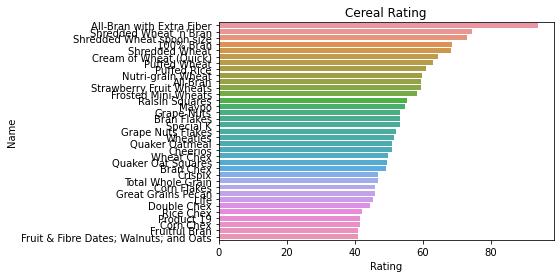

In [35]:
ax = sns.barplot(x="Rating", y="Name", data=df.sort_values('Rating',ascending=False)[:35])
_ = ax.set(xlabel='Rating', ylabel='Name',title = "Cereal Rating")

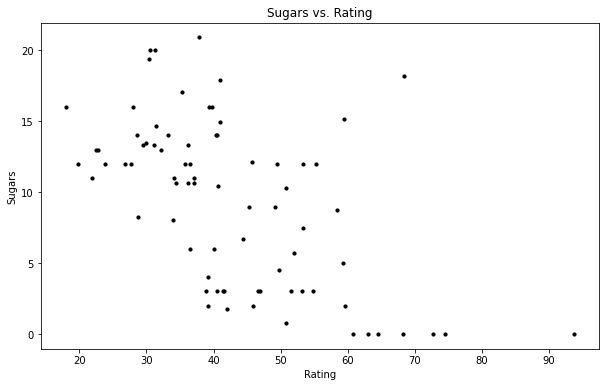

In [36]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Sugars'],s=10,c='black') 
plt.title('Sugars vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Sugars")
plt.show()

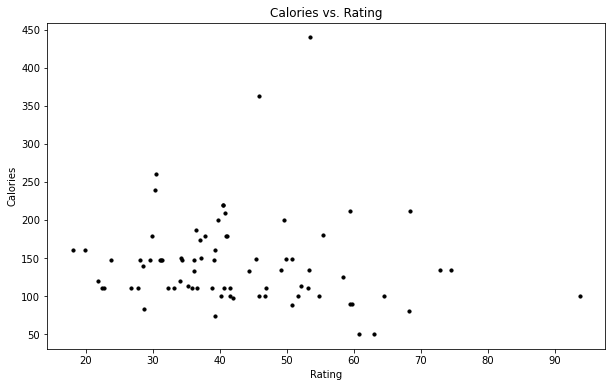

In [37]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Calories'],s=10,c='black') 
plt.title('Calories vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Calories")
plt.show()

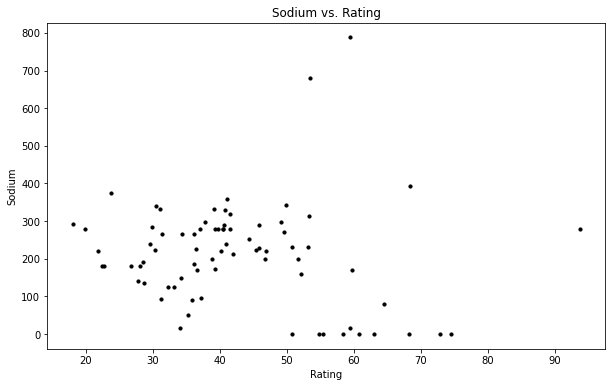

In [38]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Sodium'],s=10,c='black') 
plt.title('Sodium vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Sodium")
plt.show()

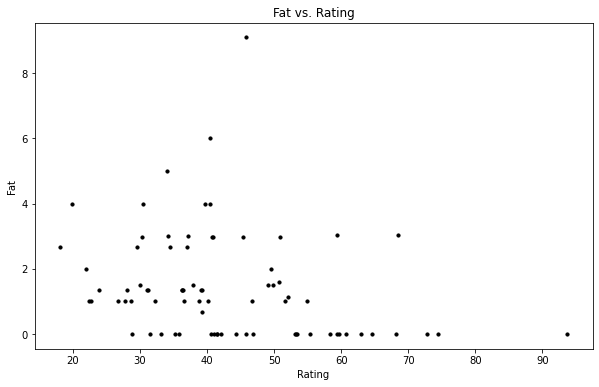

In [39]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Fat'],s=10,c='black') 
plt.title('Fat vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Fat")
plt.show()

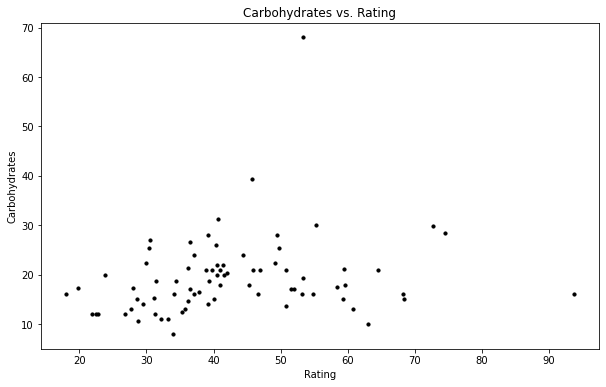

In [40]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Carbohydrates'],s=10,c='black') 
plt.title('Carbohydrates vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Carbohydrates")
plt.show()

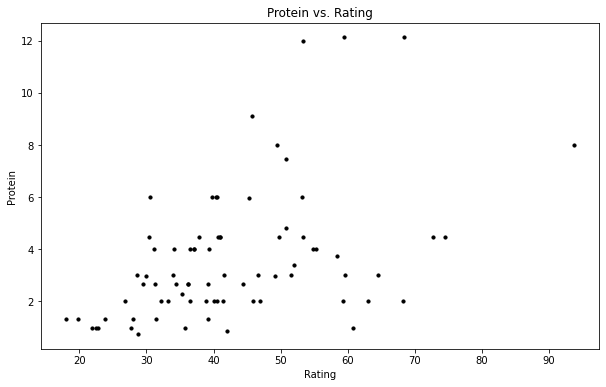

In [41]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Protein'],s=10,c='black') 
plt.title('Protein vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Protein")
plt.show()

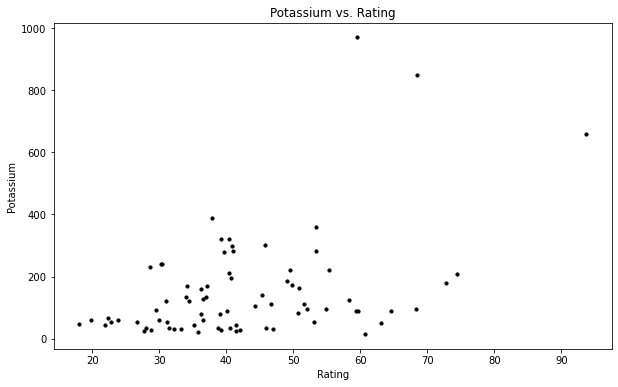

In [42]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Potassium'],s=10,c='black') 
plt.title('Potassium vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Potassium")
plt.show()

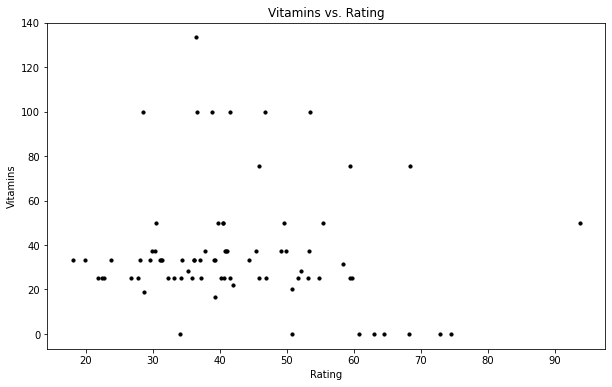

In [43]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Vitamins'],s=10,c='black') 
plt.title('Vitamins vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Vitamins")
plt.show()

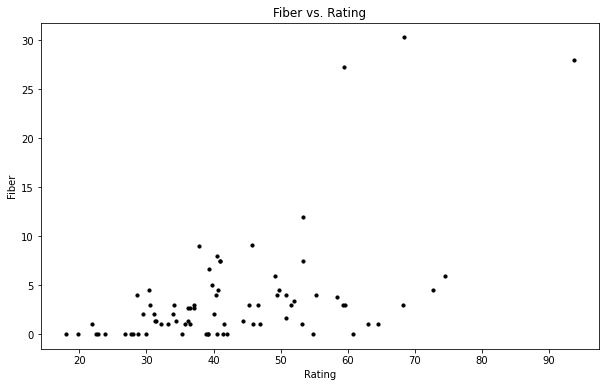

In [44]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Fiber'],s=10,c='black') 
plt.title('Fiber vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Fiber")
plt.show()

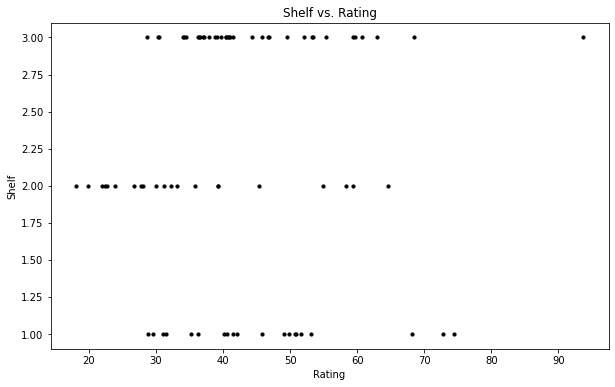

In [45]:
fig = plt.figure(figsize=(10,6))
scatter = plt.scatter(df['Rating'],df['Shelf'],s=10,c='black') 
plt.title('Shelf vs. Rating')
plt.xlabel("Rating")
plt.ylabel("Shelf")
plt.show()

In [46]:
df.groupby(['Name','Rating'])['Sugars'].max().sort_values(ascending=False)

Name                       Rating   
Post Nat. Raisin Bran      37.840594    20.895522
Smacks                     31.230054    20.000000
Oatmeal Raisin Crisp       30.450843    20.000000
Mueslix Crispy Blend       30.313351    19.402985
100% Bran                  68.402973    18.181818
                                          ...    
Puffed Rice                60.756112     0.000000
Cream of Wheat (Quick)     64.533816     0.000000
Puffed Wheat               63.005645     0.000000
All-Bran with Extra Fiber  93.704912     0.000000
Shredded Wheat spoon size  72.801787     0.000000
Name: Sugars, Length: 77, dtype: float64

In [47]:
df.groupby(['Name','Rating'])['Fat'].max().sort_values(ascending=False)

Name                   Rating   
Great Grains Pecan     45.811716    9.090909
Cracklin' Oat Bran     40.448772    6.000000
100% Natural Bran      33.983679    5.000000
Cinnamon Toast Crunch  19.823573    4.000000
Oatmeal Raisin Crisp   30.450843    4.000000
                                      ...   
Golden Crisp           35.252444    0.000000
Frosted Flakes         31.435973    0.000000
Frosted Mini-Wheats    58.345141    0.000000
Rice Chex              41.998933    0.000000
Crispix                46.895644    0.000000
Name: Fat, Length: 77, dtype: float64

In [48]:
df.groupby(['Name','Rating'])['Protein'].max().sort_values(ascending=False)

Name                Rating   
100% Bran           68.402973    12.121212
All-Bran            59.425505    12.121212
Grape-Nuts          53.371007    12.000000
Great Grains Pecan  45.811716     9.090909
Quaker Oat Squares  49.511874     8.000000
                                   ...    
Honey Graham Ohs    21.871292     1.000000
Trix                27.753301     1.000000
Cocoa Puffs         22.736446     1.000000
Rice Chex           41.998933     0.884956
Honey-comb          28.742414     0.751880
Name: Protein, Length: 77, dtype: float64

In [49]:
df.groupby(['Name','Rating'])['Fiber'].max().sort_values(ascending=False)

Name                       Rating   
100% Bran                  68.402973    30.303030
All-Bran with Extra Fiber  93.704912    28.000000
All-Bran                   59.425505    27.272727
Grape-Nuts                 53.371007    12.000000
Great Grains Pecan         45.811716     9.090909
                                          ...    
Lucky Charms               26.734515     0.000000
Kix                        39.241114     0.000000
Honey-comb                 28.742414     0.000000
Golden Grahams             23.804043     0.000000
Corn Chex                  41.445019     0.000000
Name: Fiber, Length: 77, dtype: float64

In [50]:
df.corr()

,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
Calories,1.000000,0.695173,0.571156,0.557644,0.397544,0.780076,0.550718,0.489733,0.460674,0.358350,0.917061,-0.788987,-0.086698
Protein,0.695173,1.000000,0.408003,0.499966,0.792964,0.541800,0.216115,0.830203,0.377264,0.316951,0.839599,-0.739963,0.461810
Fat,0.571156,0.408003,1.000000,0.207203,0.209571,0.139149,0.436528,0.319275,0.180092,0.317631,0.456609,-0.454542,-0.262839
Sodium,0.557644,0.499966,0.207203,1.000000,0.473645,0.449270,0.313531,0.526979,0.491255,0.197256,0.628566,-0.488716,-0.137915
Fiber,0.397544,0.792964,0.209571,0.473645,1.000000,0.217200,0.175413,0.961360,0.317400,0.306697,0.690713,-0.613779,0.534216
Carbohydrates,0.780076,0.541800,0.139149,0.449270,0.217200,1.000000,0.018214,0.253312,0.372301,0.187362,0.705815,-0.596128,0.219812
Sugars,0.550718,0.216115,0.436528,0.313531,0.175413,0.018214,1.000000,0.297595,0.249927,0.243453,0.512456,-0.487148,-0.577411
Potassium,0.489733,0.830203,0.319275,0.526979,0.961360,0.253312,0.297595,1.000000,0.339264,0.377466,0.759795,-0.677718,0.431475
Vitamins,0.460674,0.377264,0.180092,0.491255,0.317400,0.372301,0.249927,0.339264,1.000000,0.467425,0.488464,-0.348037,-0.098599
Shelf,0.358350,0.316951,0.317631,0.197256,0.306697,0.187362,0.243453,0.377466,0.467425,1.000000,0.386236,-0.335269,0.025159


In [51]:
df.groupby('Name').mean().sort_values('Rating',ascending=False)

,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
Name,,,,,,,,,,,,,
All-Bran with Extra Fiber,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,0.50,93.704912
Shredded Wheat 'n'Bran,134.328358,4.477612,0.000000,0.000000,5.970149,28.358209,0.000000,208.955224,0.000000,1,1.492537,0.67,74.472949
Shredded Wheat spoon size,134.328358,4.477612,0.000000,0.000000,4.477612,29.850746,0.000000,179.104478,0.000000,1,1.492537,0.67,72.801787
100% Bran,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,3,3.030303,0.33,68.402973
Shredded Wheat,80.000000,2.000000,0.000000,0.000000,3.000000,16.000000,0.000000,95.000000,0.000000,1,0.830000,1.00,68.235885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cocoa Puffs,110.000000,1.000000,1.000000,180.000000,0.000000,12.000000,13.000000,55.000000,25.000000,2,1.000000,1.00,22.736446
Count Chocula,110.000000,1.000000,1.000000,180.000000,0.000000,12.000000,13.000000,65.000000,25.000000,2,1.000000,1.00,22.396513
Honey Graham Ohs,120.000000,1.000000,2.000000,220.000000,1.000000,12.000000,11.000000,45.000000,25.000000,2,1.000000,1.00,21.871292


In [52]:
df.groupby('Name').median().sort_values('Rating',ascending=False)


,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugars,Potassium,Vitamins,Shelf,Weight,Cup,Rating
Name,,,,,,,,,,,,,
All-Bran with Extra Fiber,100.000000,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,3,2.000000,0.50,93.704912
Shredded Wheat 'n'Bran,134.328358,4.477612,0.000000,0.000000,5.970149,28.358209,0.000000,208.955224,0.000000,1,1.492537,0.67,74.472949
Shredded Wheat spoon size,134.328358,4.477612,0.000000,0.000000,4.477612,29.850746,0.000000,179.104478,0.000000,1,1.492537,0.67,72.801787
100% Bran,212.121212,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,3,3.030303,0.33,68.402973
Shredded Wheat,80.000000,2.000000,0.000000,0.000000,3.000000,16.000000,0.000000,95.000000,0.000000,1,0.830000,1.00,68.235885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cocoa Puffs,110.000000,1.000000,1.000000,180.000000,0.000000,12.000000,13.000000,55.000000,25.000000,2,1.000000,1.00,22.736446
Count Chocula,110.000000,1.000000,1.000000,180.000000,0.000000,12.000000,13.000000,65.000000,25.000000,2,1.000000,1.00,22.396513
Honey Graham Ohs,120.000000,1.000000,2.000000,220.000000,1.000000,12.000000,11.000000,45.000000,25.000000,2,1.000000,1.00,21.871292


In [53]:
df.groupby('Name')['Rating','Sugars','Fat','Protein','Fiber'].aggregate([min,max])

Rating                Sugars             \
                                 min        max        min        max   
Name                                                                    
100% Bran                  68.402973  68.402973  18.181818  18.181818   
100% Natural Bran          33.983679  33.983679   8.000000   8.000000   
All-Bran                   59.425505  59.425505  15.151515  15.151515   
All-Bran with Extra Fiber  93.704912  93.704912   0.000000   0.000000   
Almond Delight             34.384843  34.384843  10.666667  10.666667   
...                              ...        ...        ...        ...   
Triples                    39.106174  39.106174   4.000000   4.000000   
Trix                       27.753301  27.753301  12.000000  12.000000   
Wheat Chex                 49.787445  49.787445   4.477612   4.477612   
Wheaties                   51.592193  51.592193   3.000000   3.000000   
Wheaties Honey Gold        36.187559  36.187559  10.666667  10.666667   

                                Fat              Protein             \
                                min       max        min        max   
Name                                                                  
100% Bran                  3.030303  3.030303  12.121212  12.121212   
100% Natural Bran          5.000000  5.000000   3.000000   3.000000   
All-Bran                   3.030303  3.030303  12.121212  12.121212   
All-Bran with Extra Fiber  0.000000  0.000000   8.000000   8.000000   
Almond Delight             2.666667  2.666667   2.666667   2.666667   
...                             ...       ...        ...        ...   
Triples                    1.333333  1.333333   2.666667   2.666667   
Trix                       1.000000  1.000000   1.000000   1.000000   
Wheat Chex                 1.492537  1.492537   4.477612   4.477612   
Wheaties                   1.000000  1.000000   3.000000   3.000000   
Wheaties Honey Gold        1.333333  1.333333   2.666667   2.666667   

                               Fiber             
                                 min        max  
Name                                             
100% Bran                  30.303030  30.303030  
100% Natural Bran           2.000000   2.000000  
All-Bran                   27.272727  27.272727  
All-Bran with Extra Fiber  28.000000  28.000000  
Almond Delight              1.333333   1.333333  
...                              ...        ...  
Triples                     0.000000   0.000000  
Trix                        0.000000   0.000000  
Wheat Chex                  4.477612   4.477612  
Wheaties                    3.000000   3.000000  
Wheaties Honey Gold         1.333333   1.333333  

[77 rows x 10 columns]

Results: 
Python function that was defined during the analysis was rating_group. It was used to group all the ratings by sections of 10, to see groupings of different cereals and how rating is effected by type of cereal as well as different attribute of cereal. 



Graphs were constructed to see the data visually. 
Scatter plot was done on sugar vs rating. fat vs rating. 
High sugar in the cereal gives it a lower rating.
Similarly lower fat also gives it higher rating. 

Based on scatter plot, calories,carbohydrate,potassium,vitamin,fiber and protein showed no effect on the rating. Similarly cereal placement on the shelf has no effect on the rating. 

Min,Max,Mean and Median were used for the analysis as well. Groupby functions are also used. 

In the end rating is primarily based on sugar and fat. Also the the bran and shredded wheat type of cereal is highly rated in this dataset. 


